# Technical Analysis #

[Investopedia's definition of technical analysis](https://www.investopedia.com/terms/t/technicalanalysis.asp) is "*a method of evaluating statistical trends in trading activity, typically involving price movement and volume. It is used to identify trading and investment opportunities.*"

This Notebook aims to show how to:
1. Programmatically source financial data, 
2. Apply technical analysis on this data, and 
3. Plot the results. 

The first step is to import the packages required for this exercise.

## Import libraries ##

In [72]:
# Import packages

# Data Frames
import pandas as pd

# Vector operations
import numpy as np

# Financial Data 
import yfinance as yf # pip install yfinance

# Dates and Times
import datetime as dt

# Plotting
import matplotlib.pyplot as plt
import mplfinance as mpf # pip install mplfinance
import matplotlib.dates as mdates

## Read, write and summarize raw data ##

In [80]:
# Read in the data.
# Set ticker and get historical data for past time period.

ticker = 'AAPL'
period = '5y'
market_data = yf.download(ticker, period=period, multi_level_index=False)
market_data

[*********************100%***********************]  1 of 1 completed


,Close,High,Low,Open,Volume
Date,,,,,
2020-01-13,76.821800,76.848465,75.413627,75.532394,121532000
2020-01-14,75.784462,76.969658,75.660858,76.758797,161954400
2020-01-15,75.459679,76.467941,75.025833,75.583290,121923600
2020-01-16,76.404922,76.516418,75.641456,76.005012,108829200
2020-01-17,77.250793,77.253212,76.346748,76.654556,137816400
...,...,...,...,...,...
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000


In [81]:
market_data.describe()

,Close,High,Low,Open,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,153.214242,154.757723,151.499990,153.068112,9.011232e+07
std,42.174000,42.314470,41.954828,42.127235,5.323747e+07
min,54.509754,55.513122,51.652713,55.411085,2.323470e+07
25%,127.991440,128.822625,125.861735,127.468499,5.502090e+07
50%,151.492966,152.971373,149.556587,151.169479,7.598190e+07
75%,177.743912,179.016002,176.015498,177.415966,1.066867e+08
max,259.019989,260.100006,257.630005,258.190002,4.265100e+08


In [82]:
market_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2020-01-13 to 2025-01-10
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Open    1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


In [83]:
# Timestamp the filename

# Get the current date and time.
filename = dt.datetime.now()
# Create a string format from the current date and time.
filename = filename.strftime("_%Y%m%d_%H%M%S") 
# Prepend data folders, append file extension.
filename = 'data/' + ticker + filename + ".csv"

# Show the filename.
filename

'data/AAPL_20250111_112709.csv'

In [84]:
# Write out the data.
# Save the data to a CSV file.
market_data.to_csv(filename)

## Initial Observations ##

1. The data is clean: no blank values or NaNs.

2. The data contains trading volumes and share price information for the specified ticker and the specified (default = daily) time interval. The share price information is split into the opening  price, the highest price, the lowest price, and the closing price. These four data points for share price are often abbreviated to ['ohlc'](https://en.wikipedia.org/wiki/Open-high-low-close_chart).

3. The 'Date' column has already been loaded as dtype = datetime and set as the index of the Data Frame.

## Plotting Market Data for the specified Ticker ##

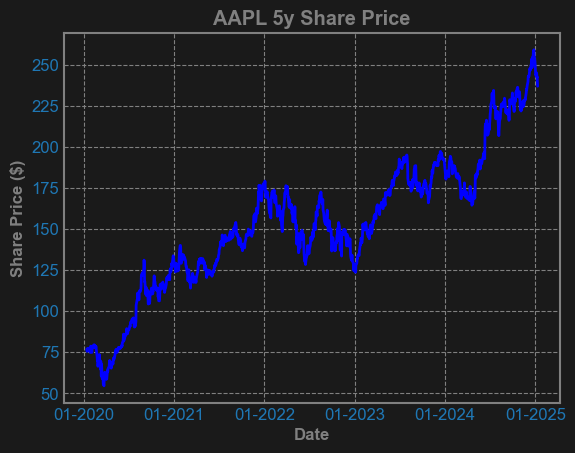

In [85]:
# Plot the Closing prices

# Style taken from the follow:
# https://coderslegacy.com/python/dark-themes-in-matplotlib/#:~:text=Matplotlib%20provides%20a%20built-in%20theme%20that%20can%20be,color%20to%20white%2C%20providing%20a%20dark%20mode%20theme.
plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " " + period + " Share Price", weight='bold', color = 'grey')

# Axis labels.
ax.set_xlabel('Date', weight='bold', color = 'grey')
ax.set_ylabel('Share Price ($)', weight ='bold', color = 'grey')

# Set date format on x-axis
# https://stackoverflow.com/questions/14946371/editing-the-date-formatting-of-x-axis-tick-labels
ax.xaxis.set_major_formatter(mdates.DateFormatter('%m-%Y'))

# Generate plot
ax.plot(market_data["Close"], color = 'blue')

# Add Grid Lines
ax.grid(True)

## Technical Indicators ("Technicals") ##

[Investopedia's deifntion]((https://www.investopedia.com/terms/t/technicalindicator.asp)) of Technical Indicators is "*heuristic or pattern-based signals produced by the price, volume, and/or open interest of a security or contract used by traders who follow technical analysis*"

There are two basic types of indicators:
- Overlays: these indicators use the same axis as the ohlc price information, and are overlaid on the price chart.
- Oscillators: these indicators plot values that range from a minimum and maximum value either above or below the price chart.

There are hundreds (if not thousands) of different technical indicators that are used by traders. The scope of this notebook is to focus on the below:
- Moving Averages
- Relative Strength Index (RSI)
- Moving Average Convergence Divergence (MACD)

## Moving Averages ##

"*Moving averages smooth out price data to create a single flowing line, helping identify trend direction. The two most frequently used types are the Simple Moving Average (SMA) and the Exponential Moving Average (EMA).*" [Source: pyquantnews](https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading)

In [86]:
# Create a function to calculate simple moving average (SMA), taking data and time period as inputs, returning the SMA.
# https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading
def calculate_sma(data, window):
    return data.rolling(window=window).mean()

In [ ]:
# Set time windows for short and long simple moving averages (SMAs).
short_window = 50
long_window = 200

# Add columns for the both SMAs to the Data Frame, using function created previously.
market_data['sma' + str(short_window)] = calculate_sma(market_data['Close'], short_window)
market_data['sma' + str(long_window)] = calculate_sma(market_data['Close'], long_window)

# Check the Data Frame.
market_data

,Close,High,Low,Open,Volume,sma 50,sma 200,sma 50 signal,sma50,sma200
Date,,,,,,,,,,
2020-01-13,76.821800,76.848465,75.413627,75.532394,121532000,NaN,NaN,0.0,NaN,NaN
2020-01-14,75.784462,76.969658,75.660858,76.758797,161954400,NaN,NaN,0.0,NaN,NaN
2020-01-15,75.459679,76.467941,75.025833,75.583290,121923600,NaN,NaN,0.0,NaN,NaN
2020-01-16,76.404922,76.516418,75.641456,76.005012,108829200,NaN,NaN,0.0,NaN,NaN
2020-01-17,77.250793,77.253212,76.346748,76.654556,137816400,NaN,NaN,0.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100,237.840298,213.756804,1.0,237.840298,213.756804
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600,238.130170,214.091675,1.0,238.130170,214.091675
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000,238.368038,214.448964,1.0,238.368038,214.448964


Text(2024-01-01 00:00:00, 125, 'Upward Trend')

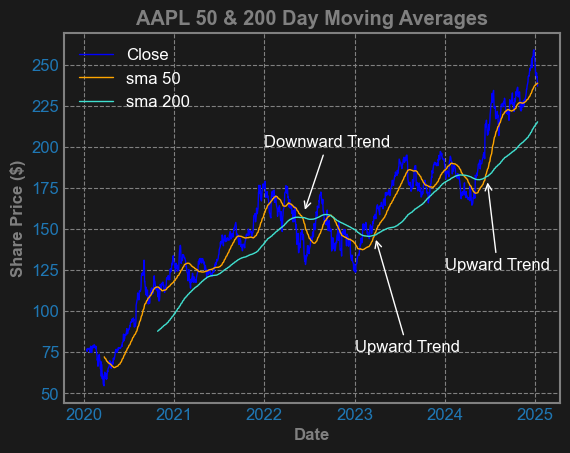

In [110]:
# Overlay simple moving averages onto the previous price chart.

plt.style.use({
    'axes.facecolor': '#1a1a1a',
    'axes.edgecolor': 'gray',
    'axes.labelcolor': 'white',
    'text.color': 'white',
    'xtick.color': 'tab:blue',
    'ytick.color': 'tab:blue',
    'grid.color': 'gray',
    'figure.facecolor': '#1a1a1a',
    'figure.edgecolor': '#1a1a1a',
    'savefig.facecolor': '#1a1a1a',
    'savefig.edgecolor': '#1a1a1a',
})

# plot figure and axes
fig, ax = plt.subplots()

# Title.
ax.set_title(ticker + " " + str(short_window) + " & " + str(long_window) + " " + "Day Moving Averages", weight='bold', color = 'grey')

# Axis labels.
ax.set_xlabel('Date', weight='bold', color = 'grey')
ax.set_ylabel('Share Price ($)', weight ='bold', color = 'grey')

# Generate plot
ax.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))

plt.legend(loc=2)

# Annotations 
### Note: Annotations below are specific for AAPL ticker ###
# They will need to be adjusted for other tickers
# https://campus.datacamp.com/courses/introduction-to-data-visualization-with-matplotlib/plotting-time-series?ex=9

ax.annotate("Downward Trend", 
            xy=(pd.Timestamp("2022-06-10"),160),
            xytext=(pd.Timestamp("2022-01-01"),200),
            arrowprops={"arrowstyle":"->", "color":"white"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2023-03-25"),145),
            xytext=(pd.Timestamp("2023-01-01"),75),
            arrowprops={"arrowstyle":"->", "color":"white"})

ax.annotate("Upward Trend", 
            xy=(pd.Timestamp("2024-06-20"),180),
            xytext=(pd.Timestamp("2024-01-01"),125),
            arrowprops={"arrowstyle":"->", "color":"white"})

In the abovew plot, the simple moving averages have been overlayed onto the share price chart. Moving average crossovers (MAC) can indicate trends upwards or downwards. Some of the signals have been annoted above. 
For traders using MAC signals, a table can be added to the DataFrame, which would be passed to an execution service in order to execute the trade.

In [114]:
# https://paperswithbacktest.com/wiki/yfinance
# https://www.slingacademy.com/article/creating-simple-trading-strategies-with-yfinance-data/
# https://www.datacamp.com/tutorial/finance-python-trading

# Create column for moving average crossover signals and initiate with values of 0.0
market_data['mac_signal'] = 0.0

# Generate trend signals based on moving average crossover (mac)
# 1.0 signals an upward trend, i.e. the short term sma is above the long term sma.
# -1.0 signals a downward trend, i.e the short term sma is below the long term sma.
# 0.0 indicates the short term sma  is neither above nor below the long term sma.

market_data['mac_signal'] = np.where(
    market_data['sma ' + str(short_window)] > market_data['sma '+ str(long_window)], 1.0,
    (np.where(market_data['sma ' + str(short_window)] < market_data['sma '+ str(long_window)], -1.0, 0.0))
)

market_data

,Close,High,Low,Open,Volume,sma 50,sma 200,sma 50 signal,sma50,sma200,mac_signal
Date,,,,,,,,,,,
2020-01-13,76.821800,76.848465,75.413627,75.532394,121532000,NaN,NaN,0.0,NaN,NaN,0.0
2020-01-14,75.784462,76.969658,75.660858,76.758797,161954400,NaN,NaN,0.0,NaN,NaN,0.0
2020-01-15,75.459679,76.467941,75.025833,75.583290,121923600,NaN,NaN,0.0,NaN,NaN,0.0
2020-01-16,76.404922,76.516418,75.641456,76.005012,108829200,NaN,NaN,0.0,NaN,NaN,0.0
2020-01-17,77.250793,77.253212,76.346748,76.654556,137816400,NaN,NaN,0.0,NaN,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...
2025-01-03,243.360001,244.179993,241.889999,243.360001,40244100,237.840298,213.756804,1.0,237.840298,213.756804,1.0
2025-01-06,245.000000,247.330002,243.199997,244.309998,45045600,238.130170,214.091675,1.0,238.130170,214.091675,1.0
2025-01-07,242.210007,245.550003,241.350006,242.979996,40856000,238.368038,214.448964,1.0,238.368038,214.448964,1.0


## Relative Strength Index (RSI) ##

"*The RSI measures the velocity and magnitude of price movements. It ranges from 0 to 100 and is commonly used to identify overbought or oversold conditions.*" [Source: pyquantnews](https://www.pyquantnews.com/free-python-resources/implementing-technical-indicators-in-python-for-trading).
 
"*Typically, an RSI above 70 indicates that a stock is oberbought, while an RSI below 30 suggests it is oversold*" [Source: slingacademy](https://www.slingacademy.com/article/applying-rsi-macd-and-bollinger-bands-with-ta-lib/)

In [112]:
# Function for RSI

def calculate_rsi(data, window):
   delta = data.diff()
   gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
   loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
   rs = gain / loss
   rsi = 100 - (100 / (1 + rs))
   return rsi

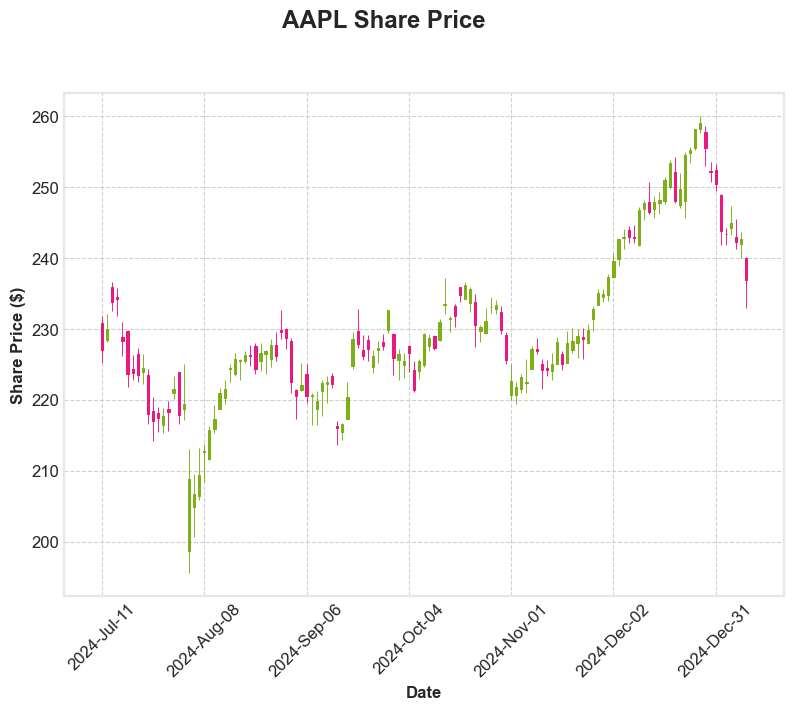

In [54]:
# Plot open, close, high and low price data on a candlestick chart, using mplfinance.
# https://github.com/matplotlib/mplfinance#tutorials
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# Initially experienced an error due to multi-column names. Set this parameter to False during the download:
# https://stackoverflow.com/questions/79133206/mplfinance-error-data-for-column-open-must-be-all-float-or-int

mpf.plot(market_data, type='candle', style='binance', figscale=1.25, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

Include volumetric data

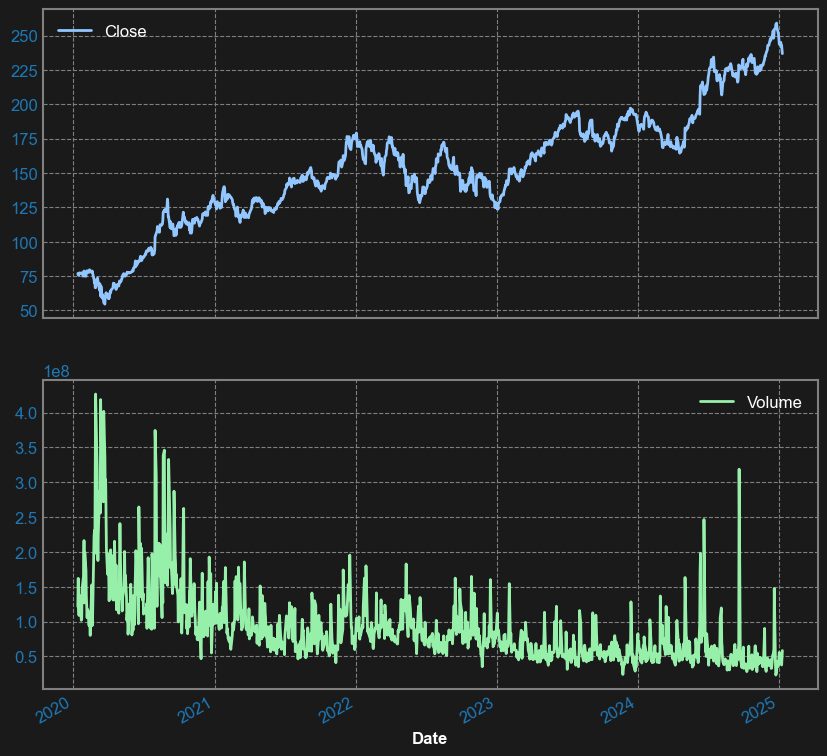

In [64]:
# Add a subplot of historical volumes
plots = market_data[['Close', 'Volume']].plot(subplots=True, figsize=(10, 10))
plt.show()

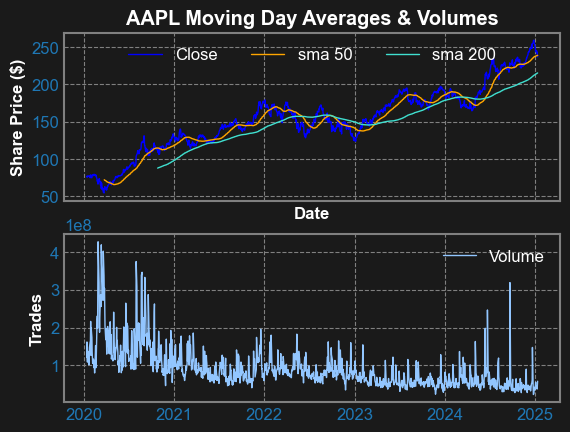

In [65]:
# Plot the Closing prices and the Moving Average
# https://www.machinelearningplus.com/plots/matplotlib-tutorial-complete-guide-python-plot-examples/


plt.style.use('seaborn-v0_8-pastel')

# plot figure and axes
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)

# Title.
ax1.set_title(ticker + " Moving Day Averages & Volumes", weight='bold')

# Axis labels.
ax1.set_xlabel('Date', weight='bold')
ax1.set_ylabel('Share Price ($)', weight ='bold')
ax2.set_ylabel('Trades', weight ='bold')

# ax2 = market_data.plot(x_compat=True)

# Generate plot
ax1.plot(market_data["Close"], color = 'blue', linewidth = 1, label = 'Close')
ax1.plot(market_data["sma "+ str(short_window)], color = 'orange', linewidth = 1, label = 'sma ' + str(short_window))
ax1.plot(market_data["sma "+ str(long_window)], color = 'turquoise', linewidth = 1, label = 'sma ' + str(long_window))
ax2.plot(market_data['Volume'], linewidth = 1, label = 'Volume')
# ax2.bar(market_data.index, market_data['Volume'], label = 'Volume')

# https://www.geeksforgeeks.org/matplotlib-pyplot-legend-in-python/
# https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html
# fig.legend(loc='upper center', ncol=4)
ax1.legend(loc='upper center', ncol=3)
ax2.legend(loc=1)

c:\Users\fdennehy\AppData\Local\anaconda3\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


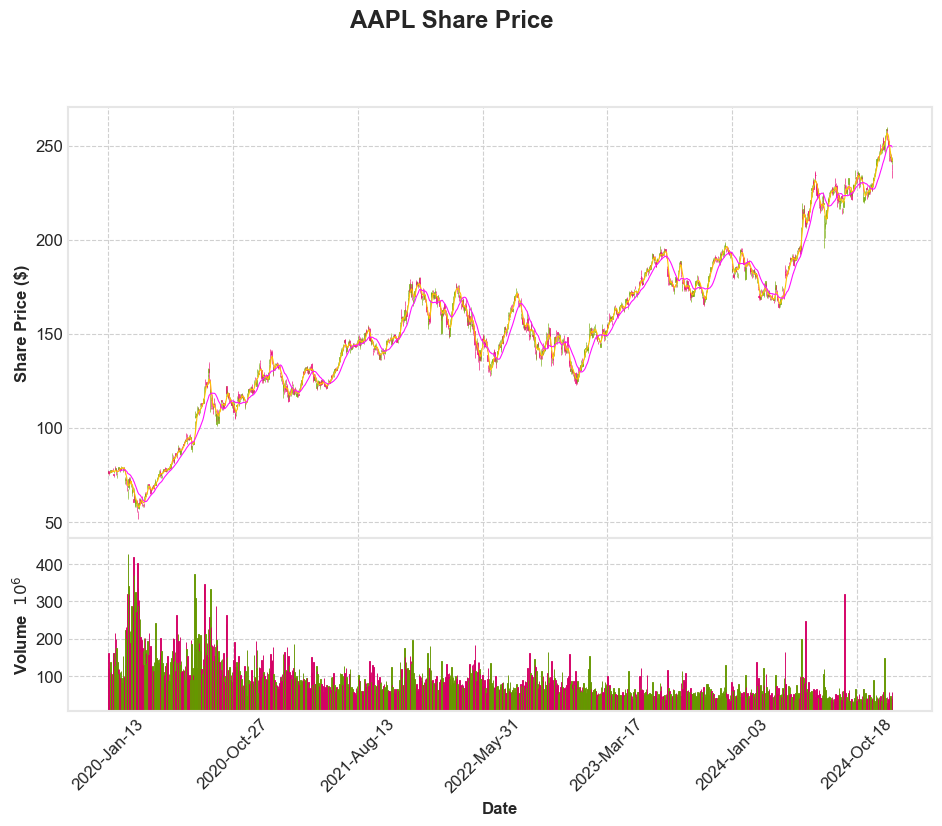

In [66]:
# Add simple moving averages and volume to candlestick chart
# https://plainenglish.io/blog/plot-stock-chart-using-mplfinance-in-python-9286fc69689
# https://stackoverflow.com/questions/71179218/what-kind-of-moving-average-will-be-drawn-when-we-use-mpl-finance-mav-function

mpf.plot(market_data, type='candle', style='binance', mav=(5,20), volume=True, figscale=1.5, 
         title=ticker + " Share Price", ylabel='Share Price ($)', xlabel='Date')

### RSI ###

### Mean Reversion ###

In [12]:
# https://www.slingacademy.com/article/backtesting-a-mean-reversion-strategy-with-yfinance/

## Backtesting ##

## End